[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-02-store-input)

## 상가(상권)정보 분석하기
* 데이터 출처 : [공공데이터포털](https://www.data.go.kr/dataset/15012005/fileData.do)
* 소상공인 상권정보 상가업소 데이터
* 영상에 사용한 데이터셋 다운로드 : http://bit.ly/open-data-set-folder

### 데이터셋을 엑셀에서 열어보는 방법

```
MS엑셀(Excel)에서 UTF-8로 된 CSV파일 불러오기
 ◦  기존 euc-kr 데이터 추출형식으로 인해 업소명 오류가 발견되었으며 이를 개선하고자 UTF-8 형식으로 추출하였습니다.
 ◦ 개발자가 아닌 일반사용자의 경우 euc-kr(UTF-8 이나 UTF-16)이 아닌 CSV파일을 엑셀에서 바로 열면 한글이 모두 깨지게 됩니다.

 ◦ 바로 열지 마시고 다음 절차를 거치시기 바랍니다.
   - 엑셀을 실행하고 데이터 → 텍스트를 선택합니다.
   - 가져올 파일을 선택하고 확인을 클릭합니다.
   - 콤보 박스에서 적절한 코드 타입이 선택됐는지 확인합니다.
     * UTF-8의 코드 페이지 넘버는 65001입니다.

   - 원본 데이터 파일 유형을 ‘구분 기호로 분리됨’ 선택합니다.
   - 기타 ‘|’(파이프) 입력, 3단계 텍스트로 선택합니다.
     * 단, 지번코드, 건물관리번호, 신우편번호, 경도, 위도 등 행마다 텍스트 선택

```

### 데이터셋 분류 지역
* 이 튜토리얼에서는 1번 파일만 사용합니다.

```
※ 파일데이터 분류 지역
1 : 서울, 부산
2 : 대구, 인천, 광주, 대전, 울산
3 : 경기, 강원, 충북
4 : 충남, 전북, 전남, 경북, 경남, 제주
```

## 라이브러리 로드

In [5]:
# 라이브러리를 로드합니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 한글폰트 설정

In [6]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "AppleGothic"
    return font_family

# plt.rc("font", family=get_font_family())

<Axes: title={'center': '한글폰트설정'}>

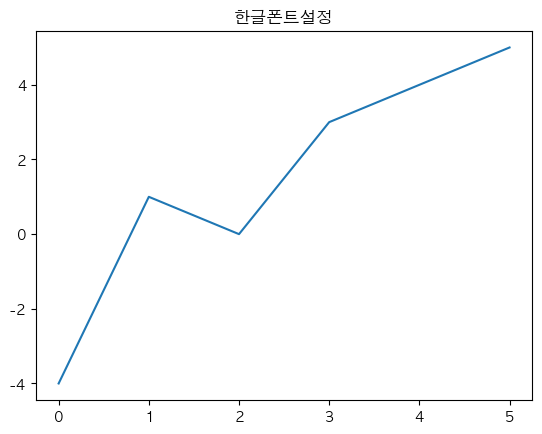

In [7]:
# 한글폰트를 설정합니다.
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)
pd.Series([-4,1,0,3,4,5]).plot(title='한글폰트설정')

In [8]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

### 한글폰트 설정 확인

<Axes: title={'center': '한글폰트설정'}>

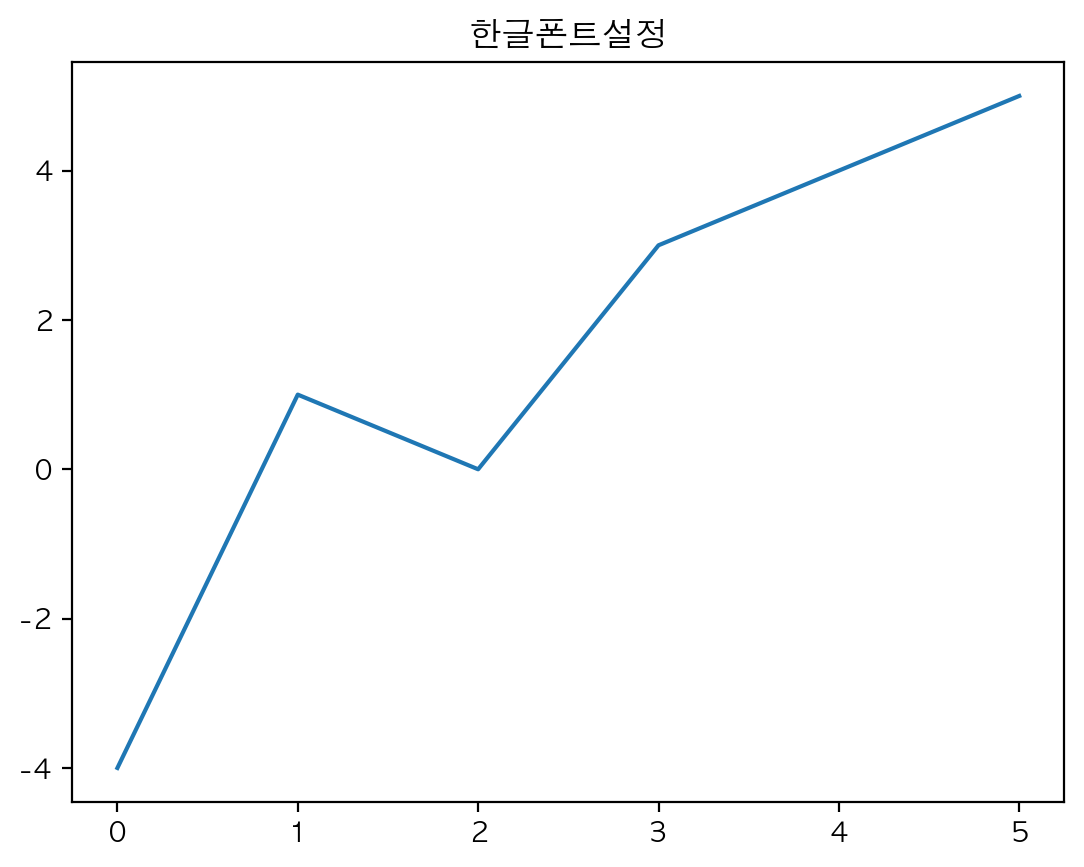

In [9]:
pd.Series([-4,1,0,3,4,5]).plot(title='한글폰트설정')

## 파일로드

In [10]:
%ls data/

seoul_municipalities_geo_simple.json*
상가업소정보_201912_01.csv*
소상공인시장진흥공단_상가(상권)정보_서울_202406.csv*


In [20]:
# 파일을 로드합니다.
df = pd.read_csv('data/소상공인시장진흥공단_상가(상권)정보_서울_202406.csv',low_memory=False)
df.shape


(460437, 39)

In [21]:
# 모든 컬럼이 표시되도록 max_columns 의 수를 지정합니다.
pd.options.display.max_columns = 39


## 미리보기

### head, tail

In [26]:
# head 로 미리보기를 합니다.
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,한식 일반 음식점업,11,서울특별시,11215,광진구,11215760,중곡3동,1121510100,중곡동,1121510100101690021,1,대지,169,21.0,서울특별시 광진구 중곡동 169-21,1.121530e+11,서울특별시 광진구 면목로,172.0,NaN,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,여관업,11,서울특별시,11140,중구,11140590,광희동,1114014500,광희동1가,1114014500101300000,1,대지,130,NaN,서울특별시 중구 광희동1가 130,1.114041e+11,서울특별시 중구 을지로42길,11.0,NaN,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,태권도 및 무술 교육기관,11,서울특별시,11350,노원구,11350619,중계본동,1135010600,중계동,1135010600103640019,1,대지,364,19.0,서울특별시 노원구 중계동 364-19,1.135031e+11,서울특별시 노원구 한글비석로,242.0,NaN,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226
3,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,사진 처리업,11,서울특별시,11470,양천구,11470600,신월5동,1147010300,신월동,1147010300100090004,1,대지,9,4.0,서울특별시 양천구 신월동 9-4,1.147030e+11,서울특별시 양천구 월정로,283.0,NaN,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
4,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,한식 일반 음식점업,11,서울특별시,11500,강서구,11500603,가양1동,1150010500,마곡동,1150010500107740012,1,대지,774,12.0,서울특별시 강서구 마곡동 774-12,1.150032e+11,서울특별시 강서구 마곡동로,55.0,NaN,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053


In [23]:
# tail 로 미리보기를 합니다.
df.tail()


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
460432,MA0101202310A0038359,마스터부동산중개사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,부동산 중개 및 대리업,11,서울특별시,11500,강서구,11500603,가양1동,1150010500,마곡동,1150010500107970001,1,대지,797,1.0,서울특별시 강서구 마곡동 797-1,1.150020e+11,서울특별시 강서구 공항대로,247.0,NaN,1150010500107970001000001,퀸즈파크나인,서울특별시 강서구 공항대로 247,157805,7803,NaN,NaN,NaN,126.834810,37.559341
460433,MA0101202310A0035270,그릿뷰티아카데미학원,NaN,P1,교육,P106,기타 교육,P10625,기타 기술/직업 훈련학원,P85669,기타 기술 및 직업 훈련학원,11,서울특별시,11260,중랑구,11260575,면목3.8동,1126010100,면목동,1126010100104720005,1,대지,472,5.0,서울특별시 중랑구 면목동 472-5,1.126030e+11,서울특별시 중랑구 사가정로,409.0,NaN,1126010100104720005000033,대도빌딩,서울특별시 중랑구 사가정로 409,131813,2214,NaN,1,NaN,127.090213,37.580598
460434,MA0101202310A0078533,최지원렌탈,NaN,S2,수리·개인,S205,가전제품 수리,S20501,가전제품 수리업,S95310,가전제품 수리업,11,서울특별시,11545,금천구,11545630,독산3동,1154510200,독산동,1154510200111440000,1,대지,1144,NaN,서울특별시 금천구 독산동 1144,1.154542e+11,서울특별시 금천구 시흥대로150길,6.0,NaN,1154510200109660001000001,한양수자인아파트,서울특별시 금천구 시흥대로150길 6,153013,8540,NaN,2,NaN,126.899154,37.475441
460435,MA0101202310A0059884,매직노래연습장,NaN,R1,예술·스포츠,R104,유원지·오락,R10407,노래방,R91223,노래 연습장 운영업,11,서울특별시,11530,구로구,11530550,구로4동,1153010200,구로동,1153010200101390124,1,대지,139,124.0,서울특별시 구로구 구로동 139-124,1.153031e+11,서울특별시 구로구 구로중앙로,23.0,NaN,1153010200101390124016658,NaN,서울특별시 구로구 구로중앙로 23,152846,8312,NaN,지,NaN,126.891074,37.492071
460436,MA0101202310A0062853,곱창꾼,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,한식 일반 음식점업,11,서울특별시,11545,금천구,11545690,시흥3동,1154510300,시흥동,1154510300109540004,1,대지,954,4.0,서울특별시 금천구 시흥동 954-4,1.154542e+11,서울특별시 금천구 시흥대로26길,11.0,7.0,1154510300109540004016744,NaN,서울특별시 금천구 시흥대로26길 11-7,153861,8652,NaN,1,NaN,126.904333,37.442069


### 인덱스 정보 보기

In [24]:
df.index

RangeIndex(start=0, stop=460437, step=1)

### 컬럼명만 보기

In [27]:
# 컬럼값만 보기
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### info

In [28]:
# info 로 데이터프레임의 정보보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     460437 non-null  object 
 1   상호명        460437 non-null  object 
 2   지점명        9092 non-null    object 
 3   상권업종대분류코드  460437 non-null  object 
 4   상권업종대분류명   460437 non-null  object 
 5   상권업종중분류코드  460437 non-null  object 
 6   상권업종중분류명   460437 non-null  object 
 7   상권업종소분류코드  460437 non-null  object 
 8   상권업종소분류명   460437 non-null  object 
 9   표준산업분류코드   460346 non-null  object 
 10  표준산업분류명    460346 non-null  object 
 11  시도코드       460437 non-null  int64  
 12  시도명        460437 non-null  object 
 13  시군구코드      460437 non-null  int64  
 14  시군구명       460437 non-null  object 
 15  행정동코드      460437 non-null  int64  
 16  행정동명       460437 non-null  object 
 17  법정동코드      460437 non-null  int64  
 18  법정동명       460437 non-null  object 
 19  지번코드       460437 non-n

### 데이터 타입 보기

In [29]:
df.dtypes

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지        float64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

## 결측치 확인하기

In [36]:
df.isnull().sum()

상가업소번호            0
상호명               0
지점명          451345
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드         91
표준산업분류명          91
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         75547
지번주소              0
도로명코드            29
도로명               0
건물본번지            30
건물부번지        399916
건물관리번호           30
건물명          240972
도로명주소             0
구우편번호             0
신우편번호             0
동정보          460437
층정보          142577
호정보          460437
경도                0
위도                0
dtype: int64

In [44]:
# 결측치를 구해서 n 이라는 변수에 담고 재사용 합니다.
n = df.isnull().sum()

### 결측치 시각화

<Axes: >

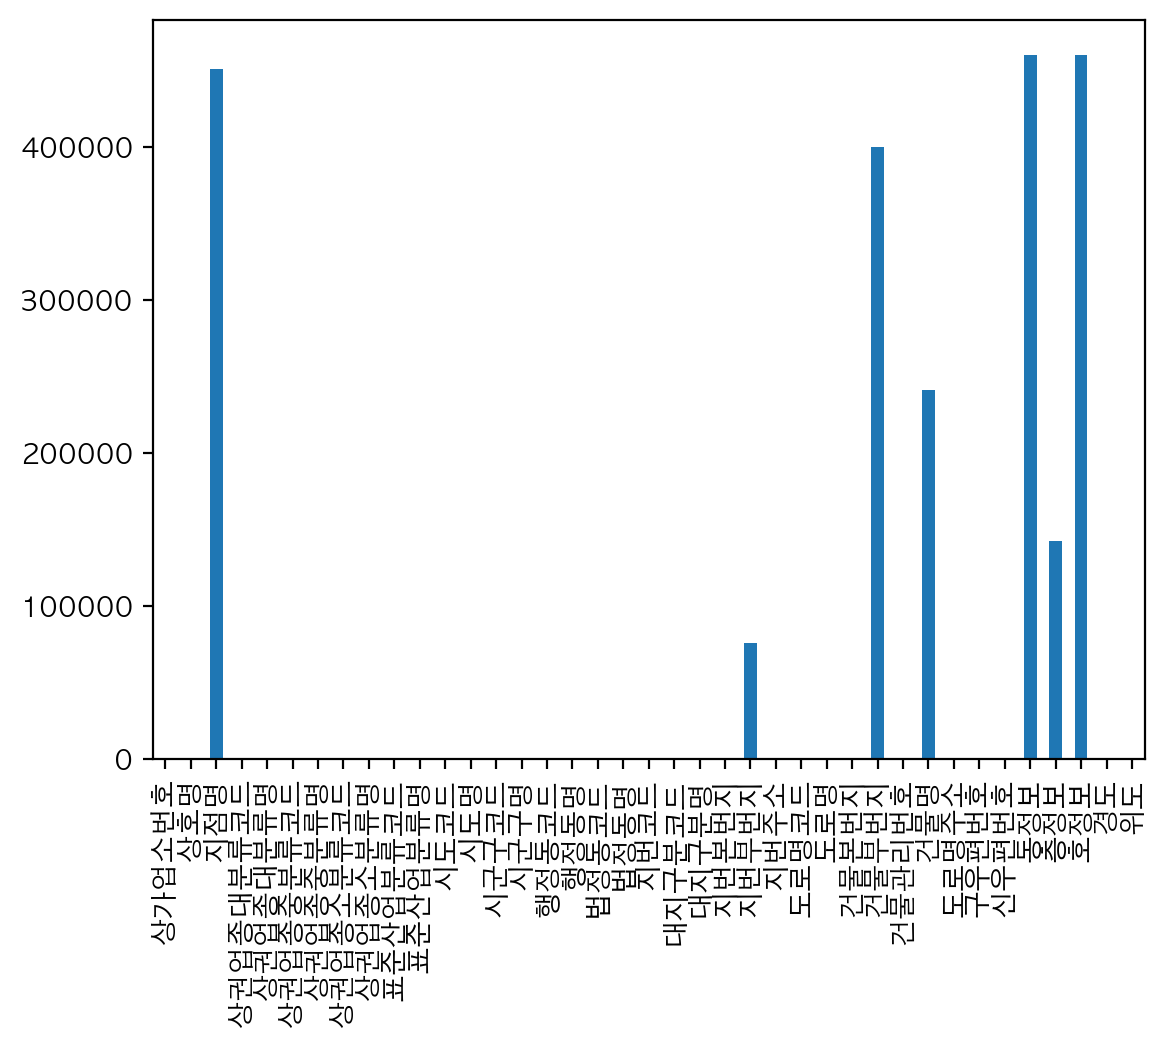

In [43]:
# 막대그래프로 시각화 합니다.
n.plot.bar()

<Axes: >

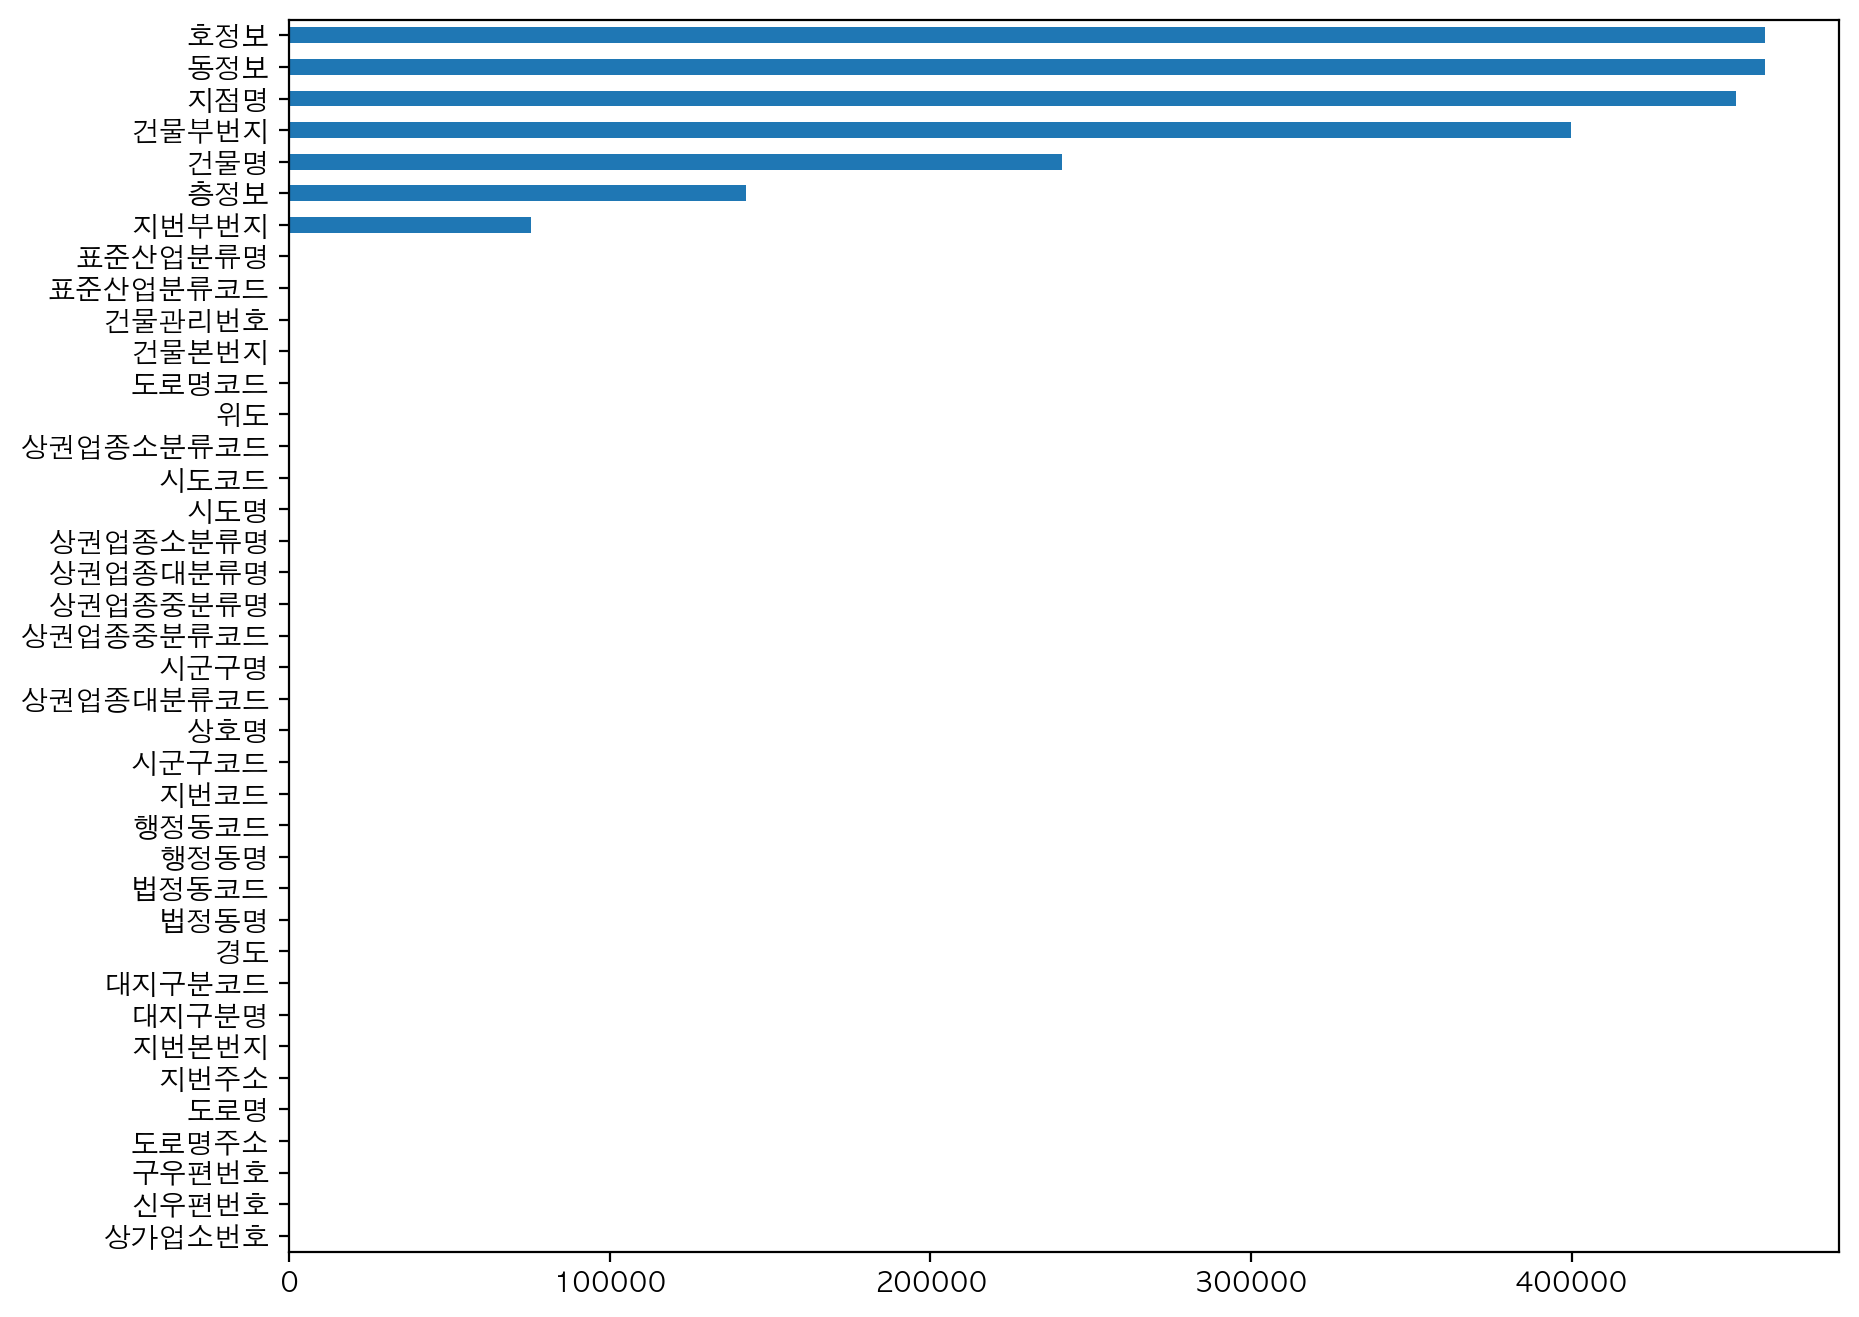

In [67]:
# 값을 정렬해서 결측치가 많은 값이 위에 그려지도록 barh로 그립니다.
n.sort_values().plot.barh(figsize=(10,8))


### missingno 로 결측치 시각화 하기
* 별도의 설치가 필요한 라이브러리 입니다. 아나콘다를 설치하게 되면 자주 사용되는 패키지와 라이브러리가 함께 설치 됩니다. 아나콘다를 사용하지 않는다면 이런 라이브러리를 따로 설치하고 의존성있는 버전을 일일이 맞춰주어야 합니다. 아나콘다는 기본적으로 자주 사용되는 판다스, 넘파이, 사이킷런, 맷플롯립 등의 라이브러리를 내장하고 있습니다. 이에 비해 missingno, folium 등의 라이브러리는 아나콘다에 포함되어 있지 않습니다. 그래서 따로 설치를 해서 사용합니다.
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요.


* 아나콘다에서 설치(다음 3가지 중 하나의 명령어를 사용)
    + conda install -c conda-forge missingno
    + conda install -c conda-forge/label/gcc7 missingno
    + conda install -c conda-forge/label/cf201901 missingno

<Axes: >

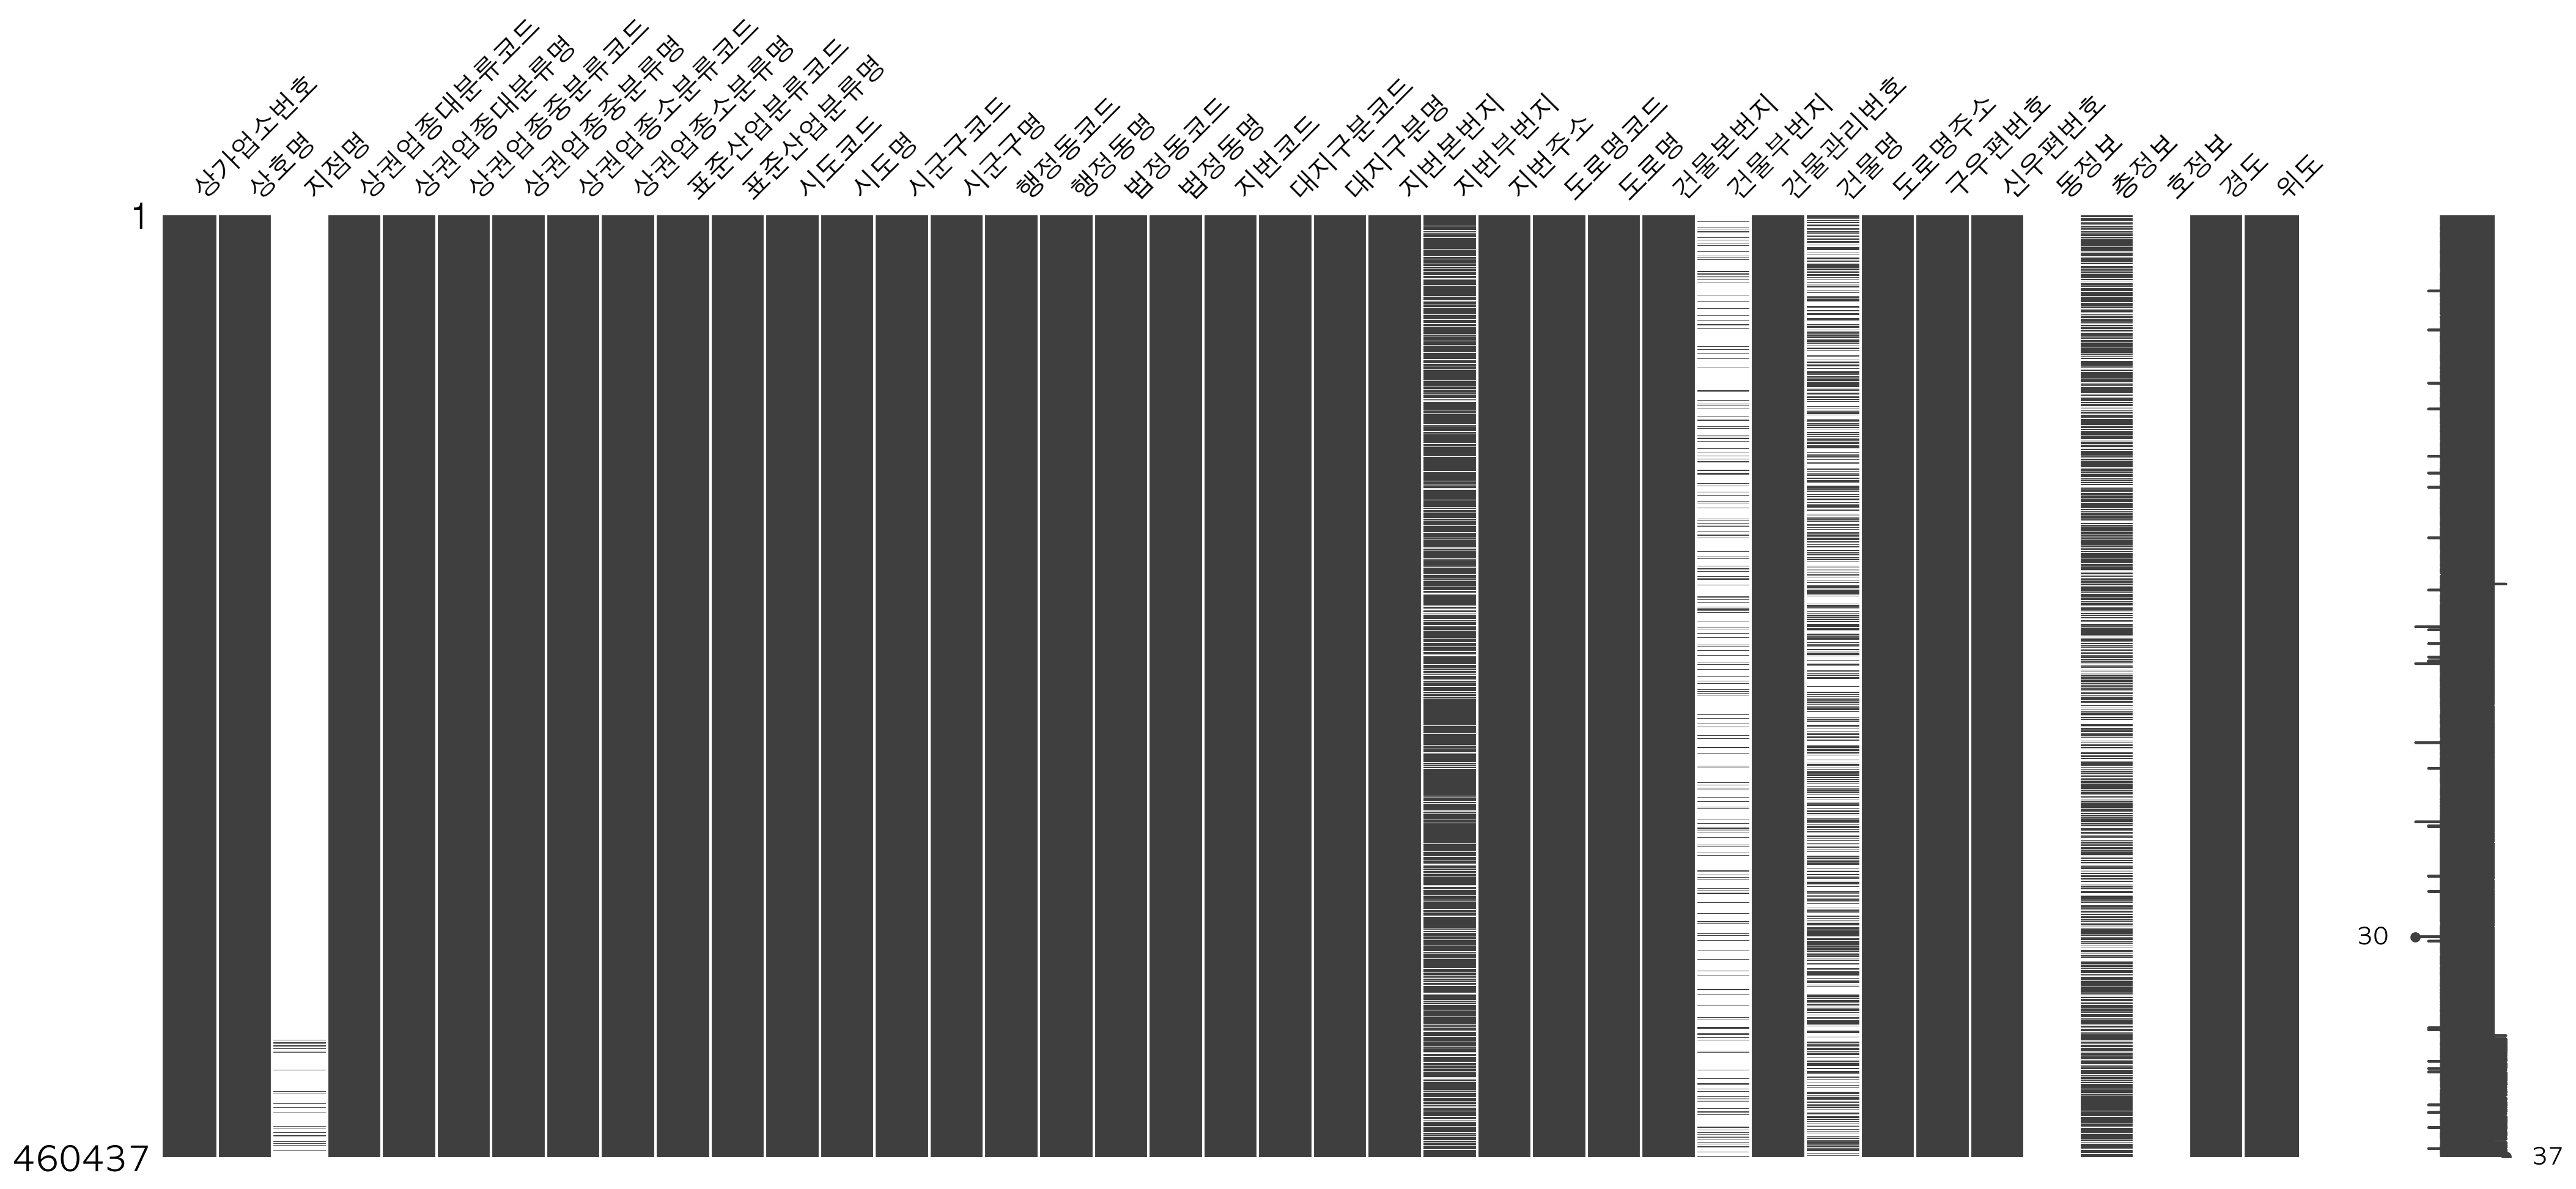

In [71]:
import missingno as msno
msno.matrix(df)

<Axes: >

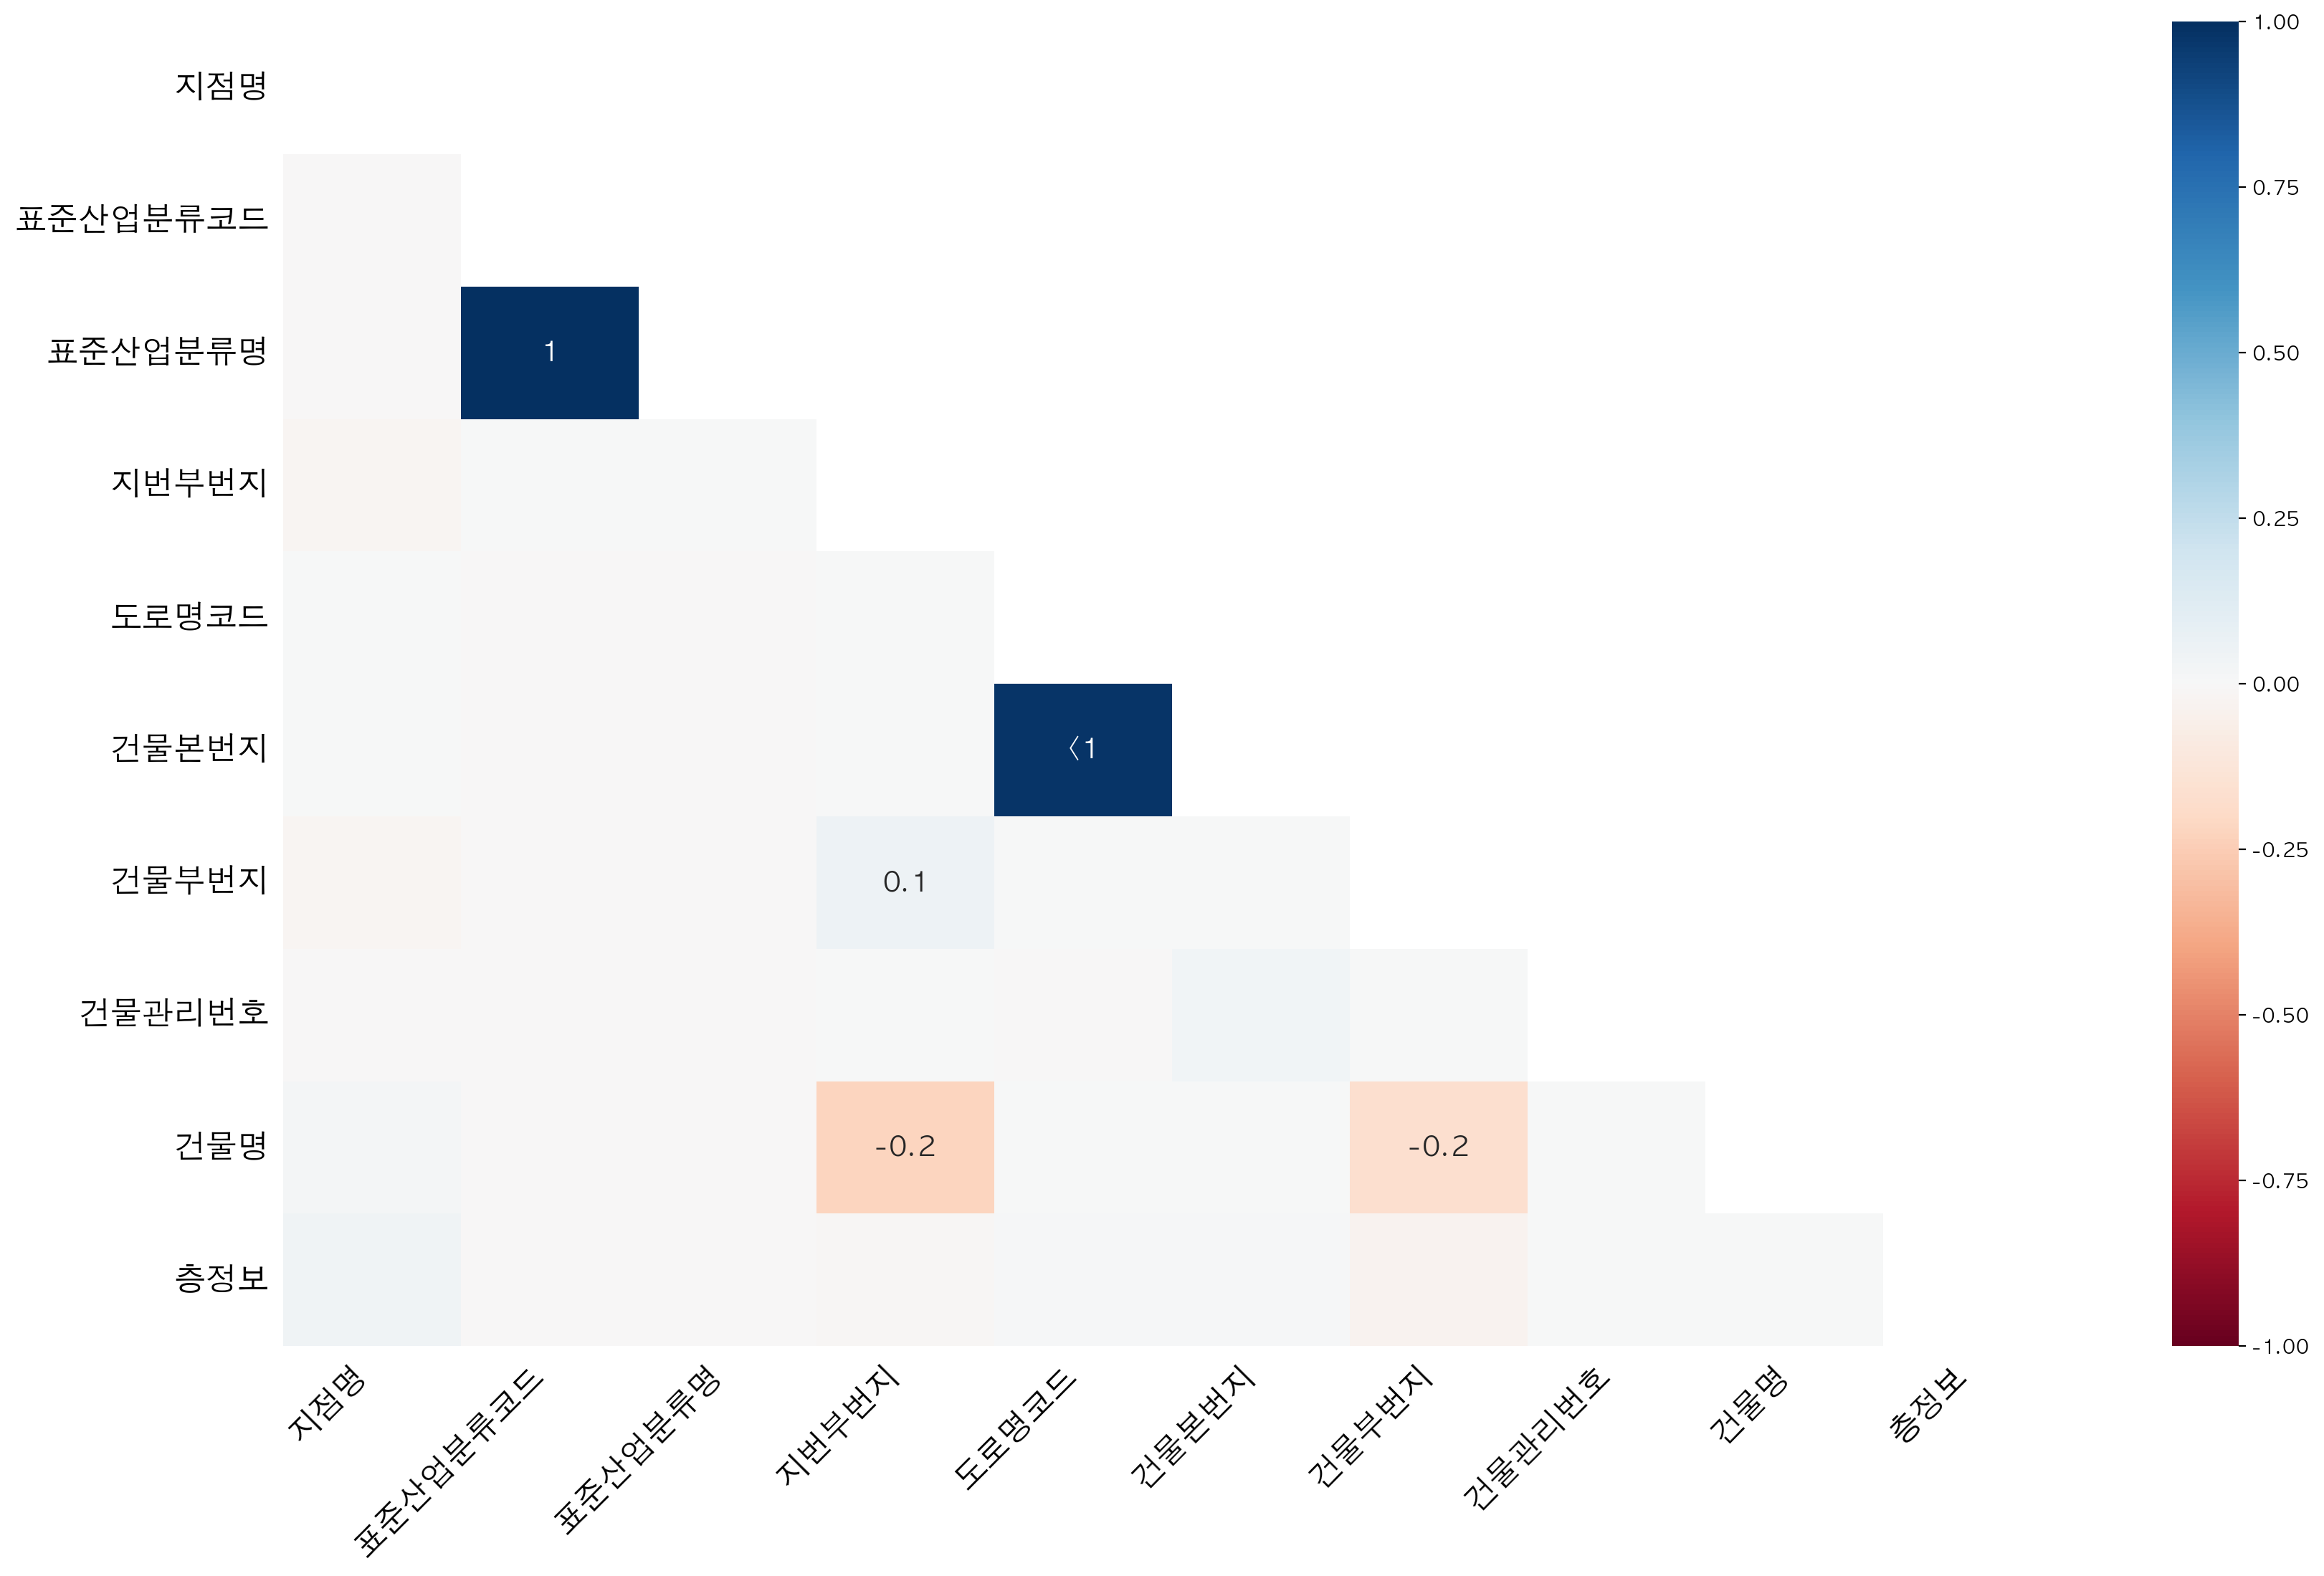

In [72]:
# heatmap 으로 표현합니다.
msno.heatmap(df)

<Axes: >

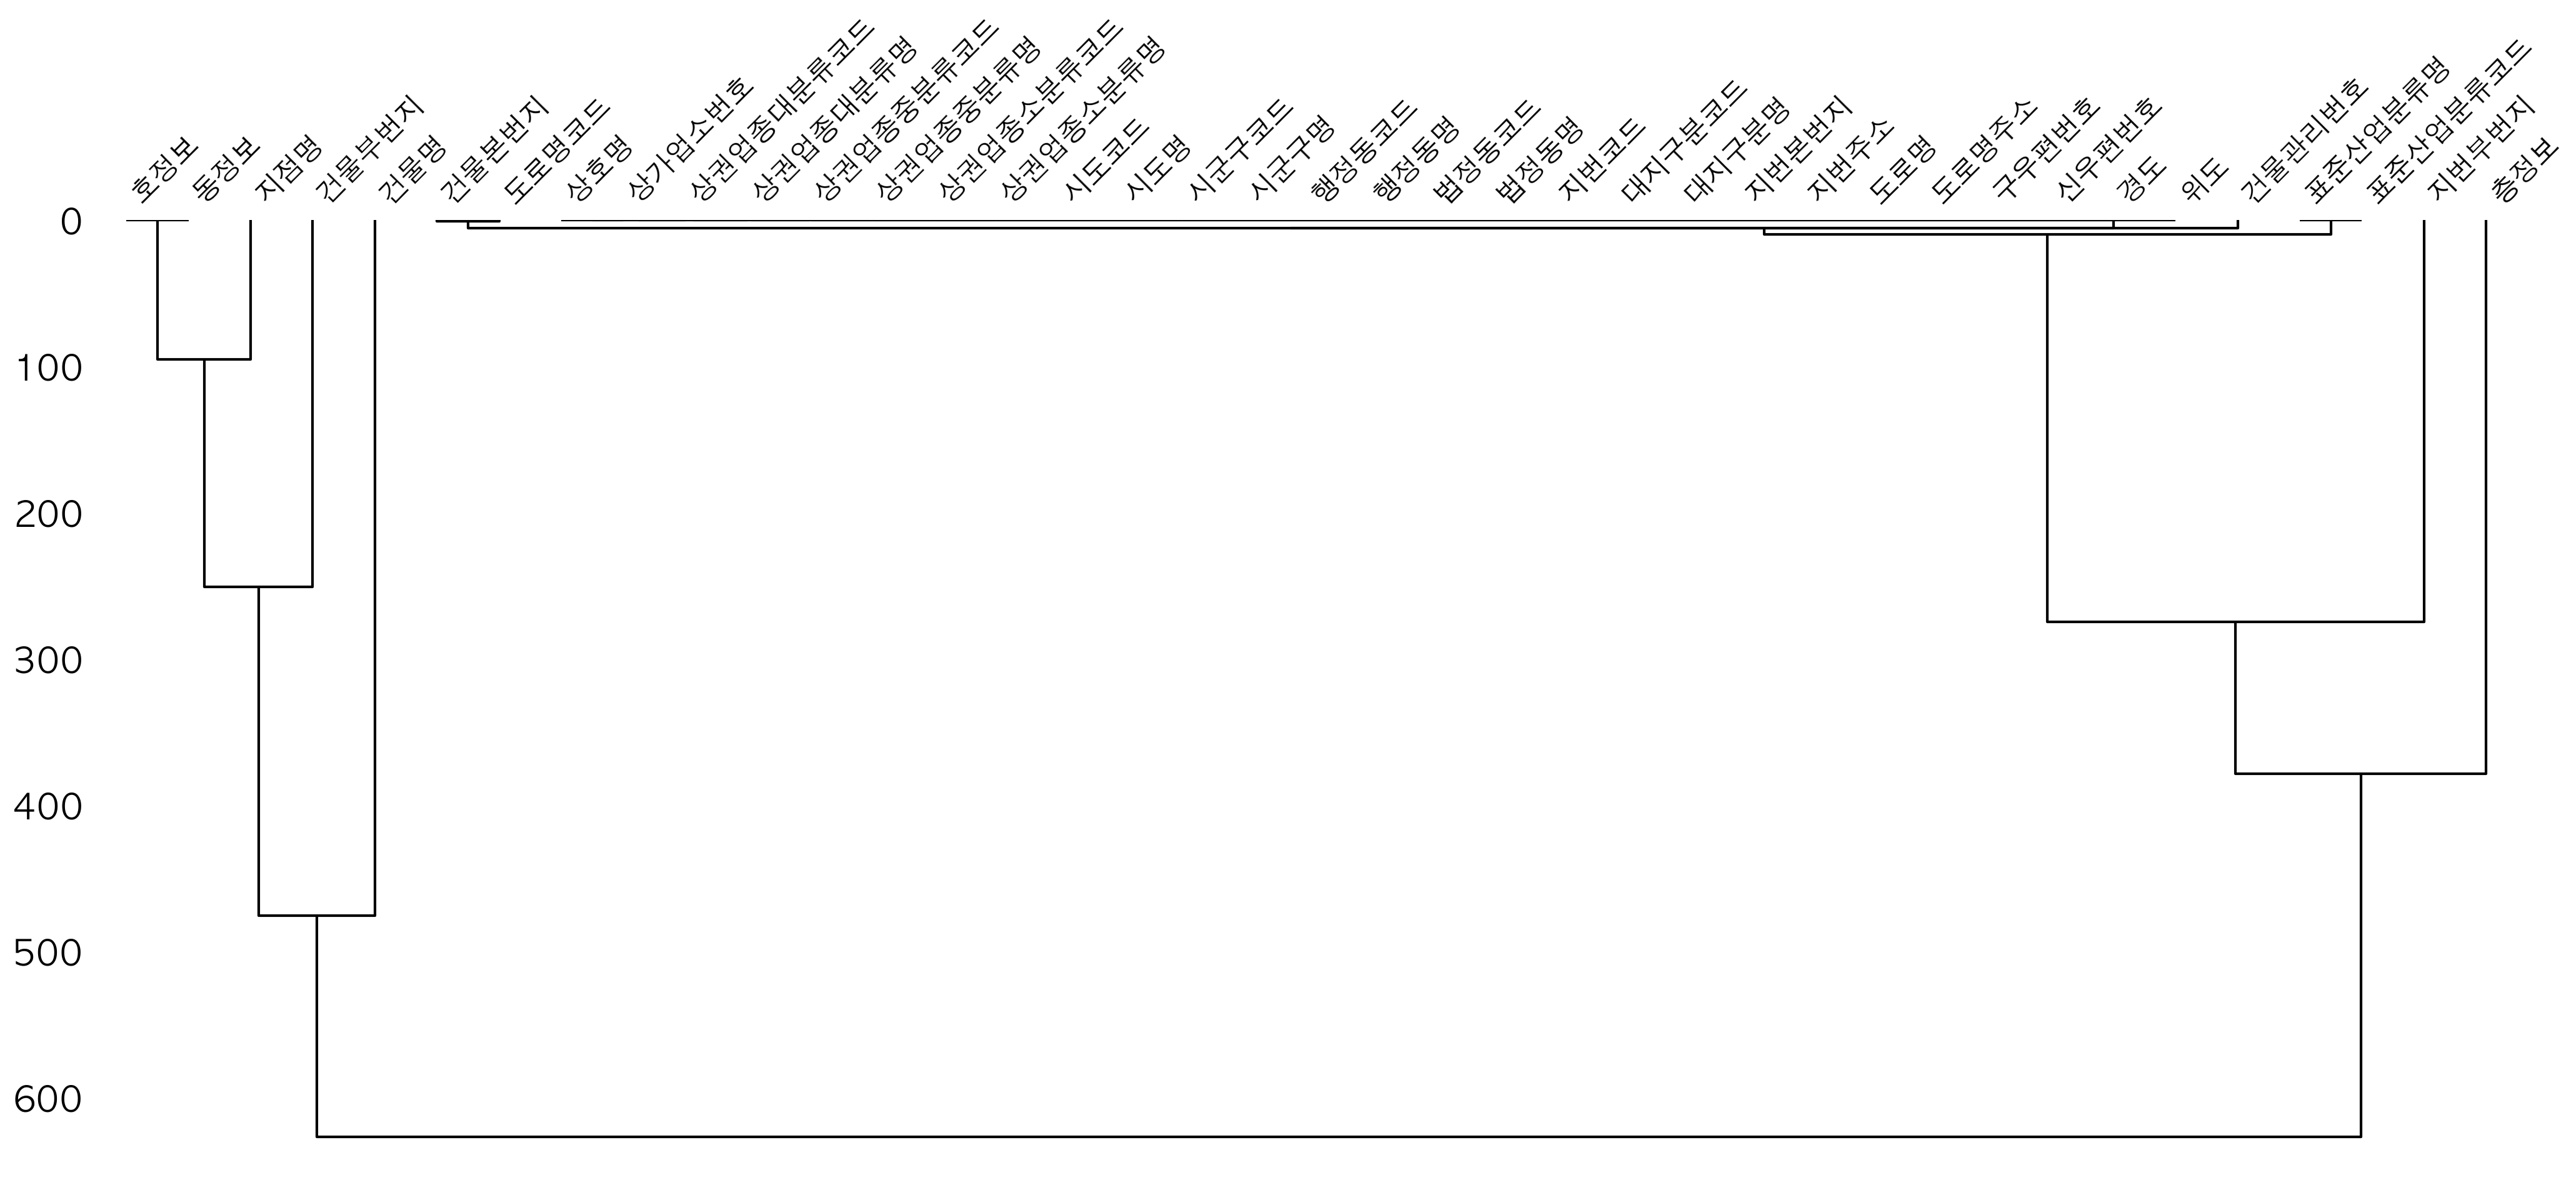

In [73]:
# dendrogram 으로 표현합니다.
msno.dendrogram(df)


## 사용하지 않는 컬럼 제거하기

### 결측치가 너무 많은 컬럼 제거하기

In [80]:
# sort_values 를 통해 결측치가 많은 데이터를 위에서 9개 가져와서 not_use 변수에 담습니다.
# not_use 변수에 담긴 인덱스값만 추출해서 not_use_col 이라는 변수에 담습니다.
not_use = n.sort_values(ascending=False).head(9) 
not_use_col = not_use.index
not_use_col


Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [85]:
# 사용하지 않는 컬럼을 제거하고 잘 제거가 되었는지 shape 의 수로 확인합니다.
print(df.shape)
df = df.drop(not_use_col,axis=1)
print(df.shape)

(460437, 39)
(460437, 30)


In [86]:
# info()를 통해 해당 컬럼이 제거되었는지 확인하며 메모리 사용량이 줄어들었는지 확인합니다.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     460437 non-null  object 
 1   상호명        460437 non-null  object 
 2   상권업종대분류코드  460437 non-null  object 
 3   상권업종대분류명   460437 non-null  object 
 4   상권업종중분류코드  460437 non-null  object 
 5   상권업종중분류명   460437 non-null  object 
 6   상권업종소분류코드  460437 non-null  object 
 7   상권업종소분류명   460437 non-null  object 
 8   시도코드       460437 non-null  int64  
 9   시도명        460437 non-null  object 
 10  시군구코드      460437 non-null  int64  
 11  시군구명       460437 non-null  object 
 12  행정동코드      460437 non-null  int64  
 13  행정동명       460437 non-null  object 
 14  법정동코드      460437 non-null  int64  
 15  법정동명       460437 non-null  object 
 16  지번코드       460437 non-null  int64  
 17  대지구분코드     460437 non-null  int64  
 18  대지구분명      460437 non-null  object 
 19  지번본번지      460437 non-n

### 사용하지 않는 컬럼 제거하기

In [89]:
# 컬럼명을 전처리 하기 위해 cols 라는 변수에 담습니다.
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [95]:
# 컬럼명에 "코드", "번호"가 있지만 이번 분석에서는 사용하지 않기 때문에
# 해당되는 컬럼만 찾아와서 cols_code 라는 변수에 담습니다.
cols_code = cols[cols.str.contains('코드|번호')]
cols_code


Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [96]:
# "코드", "번호" 가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거합니다.
#  제거 전 후에 shape를 통해 컬럼이 삭제되었는지 확인합니다.
print(df.shape)
df = df.drop(cols_code,axis=1)
print(df.shape)

(460437, 30)
(460437, 16)


In [97]:
# info를 통해 컬럼정보와 메모리 사용량 등을 확인합니다.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       460437 non-null  object 
 1   상권업종대분류명  460437 non-null  object 
 2   상권업종중분류명  460437 non-null  object 
 3   상권업종소분류명  460437 non-null  object 
 4   시도명       460437 non-null  object 
 5   시군구명      460437 non-null  object 
 6   행정동명      460437 non-null  object 
 7   법정동명      460437 non-null  object 
 8   대지구분명     460437 non-null  object 
 9   지번본번지     460437 non-null  int64  
 10  지번주소      460437 non-null  object 
 11  도로명       460437 non-null  object 
 12  건물본번지     460407 non-null  float64
 13  도로명주소     460437 non-null  object 
 14  경도        460437 non-null  float64
 15  위도        460437 non-null  float64
dtypes: float64(3), int64(1), object(12)
memory usage: 56.2+ MB


## 행, 열을 기준으로 값을 가져오기

### 열(column)기준
* df[열이름]
    * 결과가 Pandas 의 Series 형태로 반환
* df[[열목록]] : 2개 이상의 열을 가져올 때는 리스트 형태로 묶어서 지정해주어야 합니다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 열을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [98]:
# "상호명" 컬럼만 가져옵니다.
df['상호명']

0              영자's곱창
1               호텔클로이
2           나라차중계태권도장
3               이상한스냅
4                 토끼정
             ...     
460432    마스터부동산중개사무소
460433     그릿뷰티아카데미학원
460434          최지원렌탈
460435        매직노래연습장
460436            곱창꾼
Name: 상호명, Length: 460437, dtype: object

In [99]:
# "상호명", "도로명주소" 2개의 컬럼을 가져옵니다.
df[['상호명','도로명주소']]


,상호명,도로명주소
0,영자's곱창,서울특별시 광진구 면목로 172
1,호텔클로이,서울특별시 중구 을지로42길 11
2,나라차중계태권도장,서울특별시 노원구 한글비석로 242
3,이상한스냅,서울특별시 양천구 월정로 283
4,토끼정,서울특별시 강서구 마곡동로 55
...,...,...
460432,마스터부동산중개사무소,서울특별시 강서구 공항대로 247
460433,그릿뷰티아카데미학원,서울특별시 중랑구 사가정로 409
460434,최지원렌탈,서울특별시 금천구 시흥대로150길 6
460435,매직노래연습장,서울특별시 구로구 구로중앙로 23


### 행(row) 기준
* df.loc[행]
* df.loc[행, 열]


* df.loc[행이름 혹은 번호]
    * 결과가 Pandas 의 Series 형태로 반환
* df.loc[[행목록]] : 2개 이상의 행을 가져올 때는 열(column)을 가져올 때와 마찬가지로 리스트 형태로 묶어서 지정해주어야 합니다.
    * 결과가 Pandas 의 DataFrame 형태로 반환
    * 1개의 행을 2차원 리스트로 지정할 때에도 DataFrame 형태로 반환이 됩니다.

In [100]:
# 0 번째 인덱스 행을 가져옵니다.
df.iloc[0]


상호명                       영자's곱창
상권업종대분류명                      음식
상권업종중분류명                      한식
상권업종소분류명                곱창 전골/구이
시도명                        서울특별시
시군구명                         광진구
행정동명                        중곡3동
법정동명                         중곡동
대지구분명                         대지
지번본번지                        169
지번주소        서울특별시 광진구 중곡동 169-21
도로명                서울특별시 광진구 면목로
건물본번지                      172.0
도로명주소          서울특별시 광진구 면목로 172
경도                    127.082832
위도                     37.568503
Name: 0, dtype: object

In [101]:
# 0, 1,2 번째 인덱스 행을 가져옵니다.
df.loc[0:2,:]


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,영자's곱창,음식,한식,곱창 전골/구이,서울특별시,광진구,중곡3동,중곡동,대지,169,서울특별시 광진구 중곡동 169-21,서울특별시 광진구 면목로,172.0,서울특별시 광진구 면목로 172,127.082832,37.568503
1,호텔클로이,숙박,일반 숙박,여관/모텔,서울특별시,중구,광희동,광희동1가,대지,130,서울특별시 중구 광희동1가 130,서울특별시 중구 을지로42길,11.0,서울특별시 중구 을지로42길 11,127.005849,37.565708
2,나라차중계태권도장,교육,기타 교육,태권도/무술학원,서울특별시,노원구,중계본동,중계동,대지,364,서울특별시 노원구 중계동 364-19,서울특별시 노원구 한글비석로,242.0,서울특별시 노원구 한글비석로 242,127.076956,37.649226


In [104]:
# 0번째 행의 "상호명"을 가져옵니다.
df.loc[0,'상호명']


"영자's곱창"

In [105]:
# 0, 1, 2 번째 행의 "상호명"을 가져옵니다.
df.loc[[0,1,2],'상호명']

0       영자's곱창
1        호텔클로이
2    나라차중계태권도장
Name: 상호명, dtype: object

In [106]:
# 0, 1, 2 번째 행의 "상호명", "도로명주소"를 가져옵니다.
df.loc[[0,1,2],['상호명','도로명주소']]


,상호명,도로명주소
0,영자's곱창,서울특별시 광진구 면목로 172
1,호텔클로이,서울특별시 중구 을지로42길 11
2,나라차중계태권도장,서울특별시 노원구 한글비석로 242


### iloc 로 슬라이싱을 통해 가져오기

* df.iloc[:] 전체 데이터를 가져옵니다.  
* df.iloc[행, 열] 순으로 인덱스 번호를 지정합니다.
* : 은 전체를 의미합니다.
* 시작인덱스:끝나는인덱스+1을 써줍니다.
    * 예) 3:5 라면 3번째 인덱스 부터 4번째 인덱스까지 가져옵니다.
* : 에서 앞이나 뒤 인덱스를 써주지 않으면 처음부터 혹은 끝까지를 의미합니다.
    * 예) :5 => 처음부터 4번 인덱스까지 가져옵니다.
    * 예) 5: => 5번 인덱스부터 끝까지 가져옵니다.
    * 예) -5: => 뒤에서 5번째 부터 끝까지 가져옵니다.
    * 예) :-5 => 처음부터 5번째 전까지 가져옵니다.

In [111]:
# 위에서 5개의 행과, 왼쪽에서 5개의 열을 가져옵니다.
df.iloc[:5,:5]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,영자's곱창,음식,한식,곱창 전골/구이,서울특별시
1,호텔클로이,숙박,일반 숙박,여관/모텔,서울특별시
2,나라차중계태권도장,교육,기타 교육,태권도/무술학원,서울특별시
3,이상한스냅,과학·기술,사진 촬영,사진촬영업,서울특별시
4,토끼정,음식,한식,백반/한정식,서울특별시


In [114]:
# 끝에서 5개의 행과, 오른쪽에서 5개의 열을 가져옵니다.
df.iloc[-5:,-5:]


,도로명,건물본번지,도로명주소,경도,위도
460432,서울특별시 강서구 공항대로,247.0,서울특별시 강서구 공항대로 247,126.834810,37.559341
460433,서울특별시 중랑구 사가정로,409.0,서울특별시 중랑구 사가정로 409,127.090213,37.580598
460434,서울특별시 금천구 시흥대로150길,6.0,서울특별시 금천구 시흥대로150길 6,126.899154,37.475441
460435,서울특별시 구로구 구로중앙로,23.0,서울특별시 구로구 구로중앙로 23,126.891074,37.492071
460436,서울특별시 금천구 시흥대로26길,11.0,서울특별시 금천구 시흥대로26길 11-7,126.904333,37.442069


## 기술통계 값 보기

### describe 로 요약하기


* describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
* 기본적으로 수치형 데이터를 요약해서 보여줍니다.
* include, exclude 옵션으로 데이터 타입에 따른 요약수치를 볼 수 있습니다.
* 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.
* [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)

In [ ]:
# describe 로 기술통계값을 봅니다.
# DataFrame.count: Count number of non-NA/null observations.
# DataFrame.max: Maximum of the values in the object.
# DataFrame.min: Minimum of the values in the object.
# DataFrame.mean: Mean of the values.
# DataFrame.std: Standard deviation of the observations.
# DataFrame.select_dtypes: Subset of a DataFrame including/excluding
#     columns based on their dtype.



In [ ]:
# 필요한 컬럼에 대한 요약만 봅니다.
# 위도, 경도 만 따로 가져와 요약합니다.



### 개별 기술통계 값 구하기



* [Computational tools — pandas 1.0.1 documentation](https://pandas.pydata.org/docs/user_guide/computation.html#method-summary)

* count 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산
* min, max 최솟값, 최댓값
* argmin, argmax 최솟값, 최댓값이 위치한 (정수)인덱스를 반환
* idxmin, idxmax 인덱스 중 최솟값, 최댓값을 반환
* quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    * 0.25 : 1사분위 수
    * 0.5 : 2사분위수 (quantile 의 기본 값)
    * 0.75 : 3사분위수
* sum 수치 데이터의 합계
* mean 평균
* median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)
* mad 평균값으로부터의 절대 편차(absolute deviation)의 평균
* std, var 표준편차, 분산을 계산
* cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
* cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)

In [ ]:
# 결측치를 제외한 (NaN이 아닌) 값의 갯수를 계산


In [ ]:
# 평균


In [ ]:
# 최댓값


In [ ]:
# 최솟값


In [ ]:
# 1사분위 수(25%)


In [ ]:
# 2사분위 수(50%) == 중앙값


In [ ]:
# 중앙값


In [ ]:
# 중앙값 vs 평균값


In [ ]:
# 분산


* 출처 : [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%ED%8E%B8%EC%B0%A8)

표준 편차(標準 偏差, 영어: standard deviation)는 자료의 산포도를 나타내는 수치로, 분산의 양의 제곱근으로 정의된다. 표준편차가 작을수록 평균값에서 변량들의 거리가 가깝다.[1] 통계학과 확률에서 주로 확률의 분포, 확률변수 혹은 측정된 인구나 중복집합을 나타낸다. 일반적으로 모집단의 표준편차는 {\displaystyle \sigma }\sigma (시그마)로, 표본의 표준편차는 {\displaystyle S}S(에스)로 나타낸다.[출처 필요]

편차(deviation)는 관측값에서 평균 또는 중앙값을 뺀 것이다.

분산(variance)은 관측값에서 평균을 뺀 값을 제곱하고, 그것을 모두 더한 후 전체 개수로 나눠서 구한다. 즉, 차이값의 제곱의 평균이다. 관측값에서 평균을 뺀 값인 편차를 모두 더하면 0이 나오므로 제곱해서 더한다.

표준 편차(standard deviation)는 분산을 제곱근한 것이다. 제곱해서 값이 부풀려진 분산을 제곱근해서 다시 원래 크기로 만들어준다.

In [ ]:
# 표준편차 => 분산에 root 를 씌운 값입니다.



### 단변량 수치형 변수 시각화

In [ ]:
# 위도의 distplot 을 그립니다.


In [ ]:
# 경도의 distplot 을 그립니다.


In [ ]:
# 위도의 평균, 중앙값을 표현하고 color로 선의 색상을 linestyle 로 점선으로 표시해 봅니다.


### 상관계수
* [상관 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)
* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다.
* 결정계수(coefficient of determination) 는 r ** 2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [Correlation and dependence - Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence)

In [ ]:
# 각 변수의 상관계수를 구합니다.
# 기본값 변경으로 numeric_only=True 를 지정해야지만 오류가 발생하지 않습니다.
# corr = df.corr(numeric_only=True)



* 상관계수 시각화 : https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [ ]:
# 위에서 구한 상관계수를 시각화 합니다.


### 산점도로 이변량 수치형 변수 표현하기

In [ ]:
# scatterplot 으로 경도와 위도를 표현하며,
# 데이터의 갯수가 많으면 오래 걸리기 때문에 1000 개의 샘플을 추출해서 그립니다.


In [ ]:
# 위 시각화에서 회귀선을 그립니다.


[Anscombe’s quartet — seaborn 0.10.0 documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)

In [ ]:
# 회귀선을 그리는 그래프의 서브플롯을 그립니다.


### object 타입의 데이터 요약하기

In [ ]:
# include="object" 로 문자열 데이터에 대한 요약을 봅니다.


In [ ]:
# 상권업종대분류명 의 요약값을 봅니다.


In [ ]:
# 상권업종대분류명 의 unique 값을 봅니다.



In [ ]:
# 상권업종대분류명 의 unique 값의 갯수를 세어봅니다.


### 범주형 변수의 빈도수 구하기

In [ ]:
# value_counts 로 상권업종대분류명 의 빈도수를 구합니다.



## 인덱싱과 필터로 서브셋 만들기

In [ ]:
# "상권업종대분류명" 이 "음식인 데이터만 가져오기
# df_food 라는 변수에 담아줍니다. 서브셋을 새로운 변수에 저장할 때 copy()를 사용하는 것을 권장합니다.


### 강남구의 상권업종대분류가 음식만 보기

In [ ]:
# 시군구명이 "강남구" 인 데이터만 가져옵니다.


In [ ]:
# 이번에는 시군구명이 "강남구" 이고 "상권업종대분류명" 이 "음식"인 서브셋을 가져온 후
# "상권업종중분류명" 별로 빈도수를 구합니다.



In [ ]:
# 위와 똑같이 구하지만 이번에는 loc를 사용합니다.
# loc[행, 열]



### 구별 음식점 업종 비교하기

In [ ]:
# df_seoul_food 에 "시도명"이 "서울특별시" 이고 "상권업종대분류명" 이 "음식" 에 대한 서브셋만 가져와서 담아줍니다.



In [ ]:
# "시군구명", "상권업종중분류명" 으로 그룹화 해서 상점수를 세어봅니다.
# 결과를 food_gu 에 담아 재사용할 예정입니다.


In [ ]:
# food_gu 에 담긴 데이터를 시각화 합니다.
# 상권업종중분류명 과 상점수 로 barplot을 그립니다.


* https://seaborn.pydata.org/tutorial/categorical.html

In [ ]:
# catplot을 사용하여 서브프롯을 그립니다.




## 구별 학원수 비교
* 주거나 입지로 문화시설이나 학원, 교육 등을 고려하게 됩니다.
* 사교육이 발달한 지역으로 대치동이나 목동을 꼽는데 이 지역에 학원이 많이 분포 되어 있는지 알아봅니다.

### 서브셋 만들고 집계하기

In [ ]:
# 학원의 분류명을 알아보기 위해 "상권업종대분류명"의 unique 값을 추출합니다.



In [ ]:
# "시도명"이 "서울특별시"이고 "상권업종대분류명"이 "학문/교육" 인 데이터를 서브셋으로 가져옵니다.
# 재사용을 위해 서브셋을 df_academy 에 저장합니다.



In [ ]:
# df_academy 에서 "상호명"으로 빈도수를 구합니다.



In [ ]:
# "시군구명" 으로 빈도수를 구합니다.



In [ ]:
# "상권업종소분류명"으로 빈도수를 구하고 위에서 30개만 봅니다.



In [ ]:
# "상권업종소분류명"으로 빈도수를 구하고
# 빈도수가 1000개 이상인 데이터만 따로 봅니다.



In [ ]:
# "시군구명", "상권업종소분류명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.



### seaborn으로 시각화 하기

In [ ]:
# 위에서 구한 결과를 시군구명, 상호수로 barplot을 그립니다.



###  isin 을 사용해 서브셋 만들기
* 상권업종소분류명을 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.

In [ ]:
# isin 으로 빈도수로 계산했을 때 1000개 이상인 데이터만 가져와서 봅니다.
# 서브셋을 df_academy_selected 에 저장합니다.


In [ ]:
# df_academy_selected 의 "시군구명"으로 빈도수를 셉니다.



In [ ]:
# df_academy_selected 로 위에서 했던 그룹화를 복습해 봅니다.
# "상권업종소분류명", "시군구명" 으로 그룹화를 하고 "상호명"으로 빈도수를 계산합니다.
# g 라는 변수에 담아 재사용 할 예정입니다.


### Pandas 의 plot 으로 시각화

In [ ]:
# 상권업종소분류명이 index 로 되어 있습니다.
# loc를 통해 index 값을 가져올 수 있습니다.
# 그룹화된 결과 중 "학원-입시" 데이터만 가져옵니다.


In [ ]:
# 그룹화된 데이터를 시각화 하게 되면 멀티인덱스 값으로 표현이 되어 보기가 어렵습니다.
# 다음 셀부터 이 그래프를 개선해 봐요!



### unstack() 이해하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html
<img src="https://pandas.pydata.org/docs/_images/reshaping_stack.png">
<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png">

In [ ]:
# 위에서 그룹화한 데이터를 unstack() 하고 iloc로 위에서 5개 왼쪽에서 5개만 서브셋을 봅니다.



In [ ]:
# 그룹화된 결과에 unstack 을 사용하면 마지막 인덱스 컬럼이 컬럼으로 바뀝니다.



In [ ]:
# 구별로 학원 수 시각화 하기 unstack() 값에 transpose 를 하면 행과 열이 바뀝니다.



In [ ]:
# 그룹화 한 값의 인덱스를 출력해 봅니다.


In [ ]:
# 멀티인덱스보다 컬럼으로 접근이 편하기 때문에 reset_index 를 통해 인덱스값을 컬럼으로 만들어 줍니다.
# "상호명" 컬럼은 "상호수" 이기 때문에 컬럼명을 변경해 줍니다.


### 같은 그래프를 seaborn 으로 그리기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">

이미지 출처 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [ ]:
# x축에 시군구명을 y축에 상호수를 막대그래프로 그립니다.
# 상권업종소분류명 으로 색상을 다르게 표현합니다.



In [ ]:
# x축에 상권업종소분류명을 y축에 상호수를 막대그래프로 그립니다.
# 시군구명 으로 색상을 다르게 표현합니다.



In [ ]:
# "상권업종소분류명"이 "학원-입시" 인 서브셋만 가져와서 시각화 합니다.



In [ ]:
# catplot을 통해 서브플롯을 그립니다.



### 경도와 위도를 scatterplot 으로 표현하기

In [ ]:
# scatterplot 으로 경도와 위도를 표현하고 시군구명으로 색상을 다르게 표현합니다.



In [ ]:
# scatterplot 으로 경도와 위도를 표현하고 상권업종소분류명으로 색상을 다르게 표현합니다.



In [ ]:
# "상권업종소분류명"이 "학원-입시" 인 데이터만 그려봅니다.


In [ ]:
# "상권업종소분류명"이 "어린이집" 인 데이터만 그려봅니다.


In [ ]:
# 어린이집과 학원-입시를 비교해 봅니다.



## Folium 으로 지도 활용하기
아나콘다를 설치하게 되면 자주 사용되는 패키지와 라이브러리가 함께 설치 됩니다.
아나콘다를 사용하지 않는다면 이런 라이브러리를 따로 설치하고 의존성있는 버전을 일일이 맞춰주어야 합니다.
아나콘다는 기본적으로 자주 사용되는 판다스, 넘파이, 사이킷런, 맷플롯립 등의 라이브러리를 내장하고 있습니다.
이에 비해 missingno, folium 등의 라이브러리는 아나콘다에 포함되어 있지 않습니다.
그래서 따로 설치를 해서 사용합니다.


* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요.


검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`


### Folium 사용예제
* 예제목록 : http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/
* Quickstart : https://nbviewer.jupyter.org/github/python-visualization/folium/blob/main/examples/Quickstart.ipynb

In [ ]:
# 위에서 그렸던 어린이집과 학원-입시에 대한 상호 데이터를 지도에 시각화 해봅니다.


In [ ]:
# 경도와 위도의 평균을 구해서 long, lat 변수에 담습니다.



In [ ]:
# "상권업종소분류명"에 "어린이집", "학원-입시"가 들어가는 데이터만 isin을 통해 가져옵니다.



In [ ]:
# folium 으로 Marker 를 지도로 표시해 봅니다.



In [ ]:
# html 파일로 저장해 봅니다.


In [ ]:
# loc를 통해 특정 상호명을 접근해 봅니다.



In [ ]:
# index 만 가져옵니다.



In [ ]:
# for문으로 데이터프레임을 순회하며 원하는 값을 가져옵니다.



In [ ]:
# 위에서 작성해본 for문을 활용해 CircleMarker 로 표현해 봅니다.

